## 0. Load packages and functions

In [23]:
# For the notebook to work you must have m3_learning installed
# pip install m3_learning

%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../../src')
from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.util.file_IO import download_and_unzip
from m3_learning.viz.printing import printer
from m3_learning.RHEED.Dataset import RHEED_spot_Dataset, RHEED_parameter_dataset
from m3_learning.RHEED.Viz import Viz
from m3_learning.RHEED.Fit import RHEED_image_processer, Gaussian

# from m3_learning.be.dataset import BE_Dataset
printing_image = printer(basepath = 'Figures/1.Fit_RHEED_spot/')
printing_plot = printer(basepath = 'Figures/1.Fit_RHEED_spot/', fileformats=['png'])

set_style("printing")
random_seed(seed=42)

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


In [ ]:
growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 
               'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
D1_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', head_tail=(100,300), interval=200, 
            filename = True, printing=printing_plot)

In [2]:
# import os, glob, h5py, json, sys
# from datafed.CommandLib import API
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib as mpl

# sys.path.append('../libs/') 
# from analyze_spot_functions import NormalizeData, Gaussian, RHEED_image_processer
# from visualize_functions import show_images, set_labels

## 1. download datasets from Zenodo

In [3]:
# # Download the data file from Zenodo
# url = 'https://zenodo.org/record/7774788/files/PZT_2080_raw_data.h5?download=1'

# # Specify the filename and the path to save the file
# filename = 'data_raw.h5'
# save_path = './../../Data/2023_rapid_fitting'

# # download the file
# download_and_unzip(filename, url, save_path)

In [4]:
# df_api = API()
# ls_resp = df_api.collectionItemsList('c/393370045')
# print(ls_resp)

In [5]:
# # sample 1
# dv_resp = df_api.dataView('d/400460226')
# id_index = dv_resp[0].data[0].id
# get_resp = df_api.dataGet(id_index, '../../data/', orig_fname=True, wait=True)
# get_resp

In [6]:
# # sample 2
# dv_resp = df_api.dataView('d/400569828')
# id_index = dv_resp[0].data[0].id
# get_resp = df_api.dataGet(id_index, '../../data/', orig_fname=True, wait=True)
# get_resp

In [7]:
# # sample 3
# dv_resp = df_api.dataView('d/403087357')
# id_index = dv_resp[0].data[0].id
# get_resp = df_api.dataGet(id_index, '../../data/', orig_fname=True, wait=True)
# get_resp

## 2. Fitting the RHEED Dataset

### 2.1 Sample treated_213nm

#### 2.1.1 Loading the Dataset

In [24]:
path = 'D:/datasets/RHEED_data/STO_STO_test6_06292022-standard.h5'
D1_spot = RHEED_spot_Dataset(path, sample_name='treated_213nm')
D1_spot.data_info

Growth: background_with_heater, Size of data: f(2251, 300, 300)
Growth: background_without_heater, Size of data: f(2942, 300, 300)
Growth: growth_1, Size of data: f(13189, 300, 300)
Growth: growth_10, Size of data: f(12336, 300, 300)
Growth: growth_11, Size of data: f(12799, 300, 300)
Growth: growth_12, Size of data: f(12563, 300, 300)
Growth: growth_2, Size of data: f(12858, 300, 300)
Growth: growth_3, Size of data: f(11392, 300, 300)
Growth: growth_4, Size of data: f(13067, 300, 300)
Growth: growth_5, Size of data: f(12619, 300, 300)
Growth: growth_6, Size of data: f(12610, 300, 300)
Growth: growth_7, Size of data: f(12431, 300, 300)
Growth: growth_8, Size of data: f(12553, 300, 300)
Growth: growth_9, Size of data: f(12568, 300, 300)


#### 2.1.2 Locate the diffraction spots

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_growth_2_0.png
Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_growth_2_0.svg


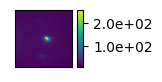

In [25]:
D1_spot.viz_RHEED_spot(growth='growth_2', index=0, filename=True, printing=printing_image)

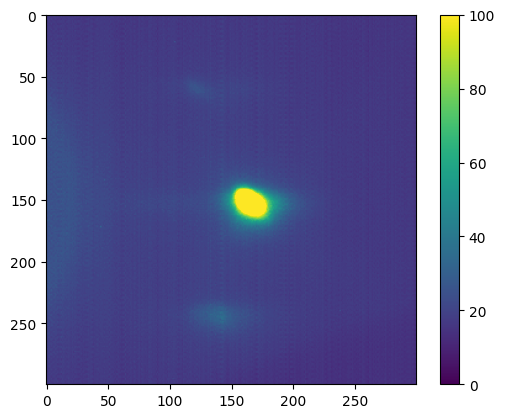

In [26]:
plt.imshow(D1_spot.growth_dataset('growth_2', index=0))
plt.colorbar()
plt.clim(0, 100)

#### 2.1.3 Visualize an example

img_sum:48241.00, img_max:31.00, img_mean:20.10
img_rec_sum:48030.96, img_rec_max:22.65, img_rec_mean:20.01
height:22.65, x:22.31, y:26.81, width_x:30.30, width_y_max:57.73
a: raw_image b: reconstructed_image c: difference


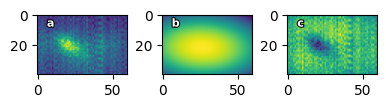

a: original, b: reconstructed image, c: difference
img_sum:45531.00, img_max:23.00, img_mean:18.97
img_rec_sum:45440.48, img_rec_max:19.94, img_rec_mean:18.93
height:19.94, x:20.29, y:34.92, width_x:42.13, width_y_max:114.21
a: raw_image b: reconstructed_image c: difference


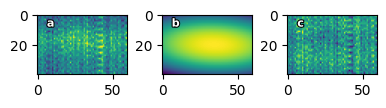

a: original, b: reconstructed image, c: difference
img_sum:120241.00, img_max:255.00, img_mean:86.38
img_rec_sum:105894.35, img_rec_max:260.62, img_rec_mean:76.07
height:260.95, x:17.81, y:19.75, width_x:7.32, width_y_max:10.65
a: raw_image b: reconstructed_image c: difference


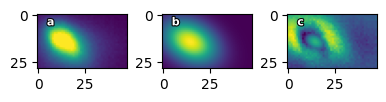

a: original, b: reconstructed image, c: difference
img_sum:87657.00, img_max:183.00, img_mean:62.97
img_rec_sum:82424.84, img_rec_max:139.73, img_rec_mean:59.21
height:139.78, x:14.58, y:31.86, width_x:8.56, width_y_max:14.55
a: raw_image b: reconstructed_image c: difference


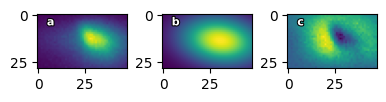

a: original, b: reconstructed image, c: difference
img_sum:47740.00, img_max:36.00, img_mean:22.95
img_rec_sum:47200.00, img_rec_max:27.82, img_rec_mean:22.69
height:27.83, x:14.75, y:19.52, width_x:21.56, width_y_max:47.67
a: raw_image b: reconstructed_image c: difference


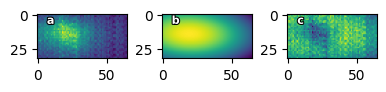

a: original, b: reconstructed image, c: difference
img_sum:49480.00, img_max:34.00, img_mean:23.79
img_rec_sum:49086.48, img_rec_max:27.89, img_rec_mean:23.60
height:27.90, x:13.87, y:44.06, width_x:20.56, width_y_max:62.86
a: raw_image b: reconstructed_image c: difference


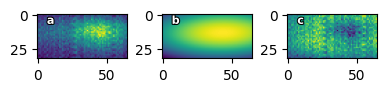

a: original, b: reconstructed image, c: difference


In [27]:
crop_dict = {'spot_1': [40, 80, 100, 160], 'spot_2': [137, 166, 147, 195], 'spot_3': [230, 262, 115, 180]}
fit_function = Gaussian().recreate_gaussian
processor = RHEED_image_processer(D1_spot, crop_dict, fit_function)
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_1', frame=0)
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_1', frame=0)
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_2', frame=0)
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_2', frame=0)
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_3', frame=0)
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_3', frame=0)

#### 2.1.4 Generate the metrics of spot

In [ ]:
parameters_file_path =  'D:/datasets/RHEED_data/test6_gaussian_fit_parameters_all-04232023.h5'
growth_list = ['background_with_heater', 'background_without_heater', 'growth_1', 'growth_2', 'growth_3', 'growth_4', 
             'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']

if __name__ == '__main__':
    processor.write_h5_file(parameters_file_path, growth_list, replace=True)

h5 file exist.
Replace with new file.


c:\Users\yig319\Anaconda3\envs\m3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


#### 2.1.5 Exam the dataset

In [28]:
path = 'D:/datasets/RHEED_data/test6_gaussian_fit_parameters_all-04232023.h5'
D1_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='treated_213nm')
D1_para.data_info   

Growth: background_with_heater:
--spot: spot_1:
----height:, Size of data: (2251,)
----height:, Size of data: (2251,)
----img_max:, Size of data: (2251,)
----img_max:, Size of data: (2251,)
----img_mean:, Size of data: (2251,)
----img_mean:, Size of data: (2251,)
----img_rec_max:, Size of data: (2251,)
----img_rec_max:, Size of data: (2251,)
----img_rec_mean:, Size of data: (2251,)
----img_rec_mean:, Size of data: (2251,)
----img_rec_sum:, Size of data: (2251,)
----img_rec_sum:, Size of data: (2251,)
----img_sum:, Size of data: (2251,)
----img_sum:, Size of data: (2251,)
----raw_image:, Size of data: (2251, 40, 60)
----raw_image:, Size of data: (2251, 40, 60)
----reconstructed_image:, Size of data: (2251, 40, 60)
----reconstructed_image:, Size of data: (2251, 40, 60)
----width_x:, Size of data: (2251,)
----width_x:, Size of data: (2251,)
----width_y:, Size of data: (2251,)
----width_y:, Size of data: (2251,)
----x:, Size of data: (2251,)
----x:, Size of data: (2251,)
----y:, Size of da

img_sum:61247.00, img_max:87.00, img_mean:44.00
img_rec_sum:59368.68, img_rec_max:72.97, img_rec_mean:42.65
height:72.98, x:15.40, y:20.73, width_x:10.33, width_y_max:20.36
a: raw_image b: reconstructed_image c: difference
Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_growth_2_spot_2_10000_img,img_rec,differerce.png
Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_growth_2_spot_2_10000_img,img_rec,differerce.svg


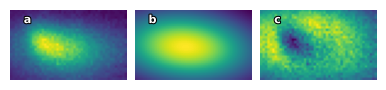

In [29]:
D1_para.viz_RHEED_parameter(growth='growth_2', spot='spot_2', index=10000, filename = True, printing=printing_image)

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_img_sum.png


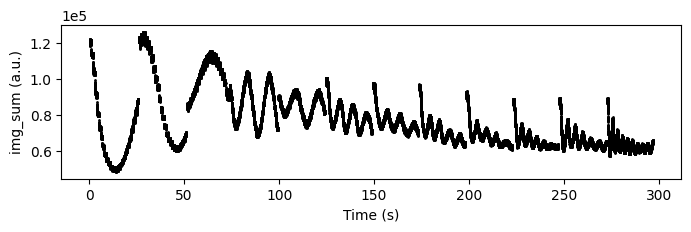

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_img_max.png


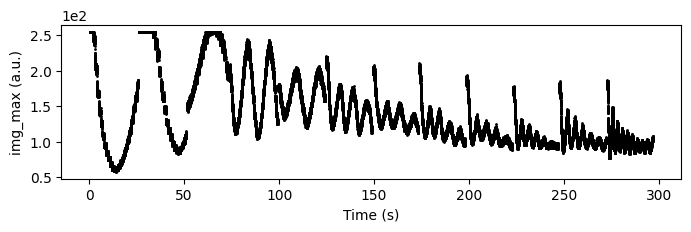

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_img_mean.png


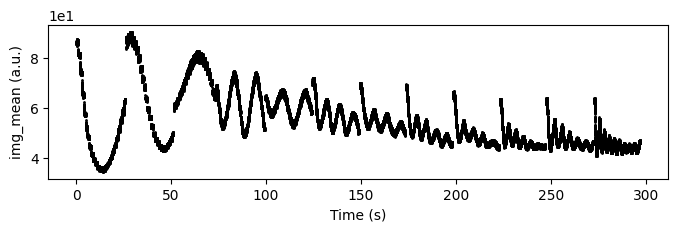

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_img_rec_sum.png


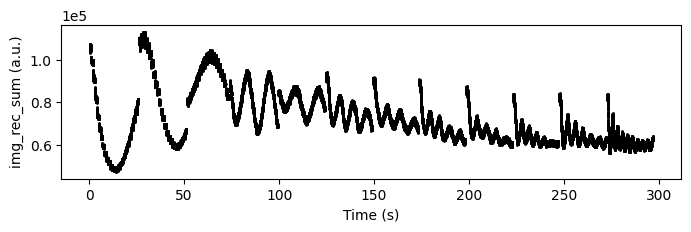

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_img_rec_max.png


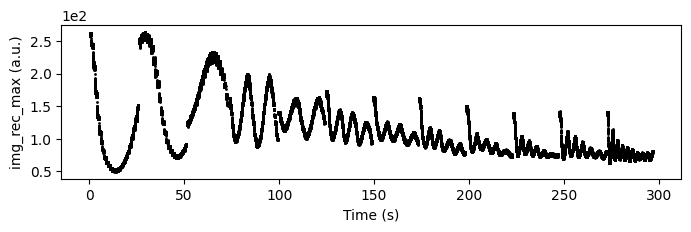

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_img_rec_mean.png


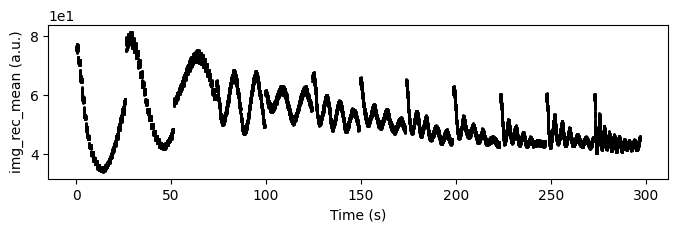

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_height.png


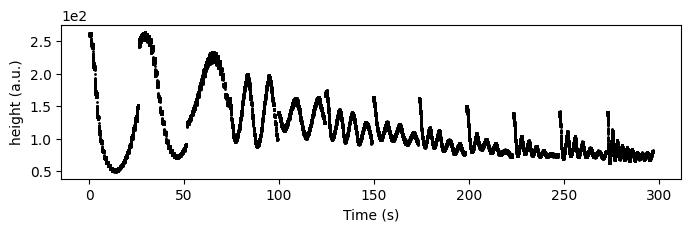

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_x.png


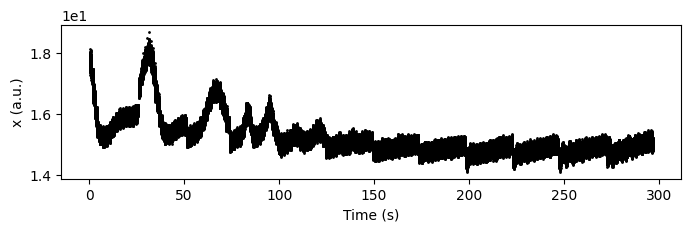

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_y.png


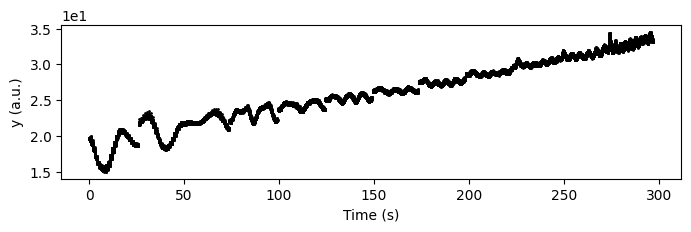

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_width_x.png


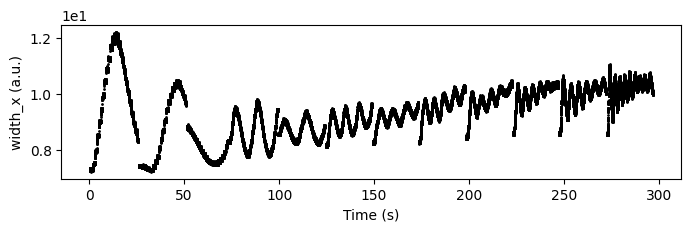

Figures/1.Fit_RHEED_spot/RHEED_treated_213nm_spot_2_width_y.png


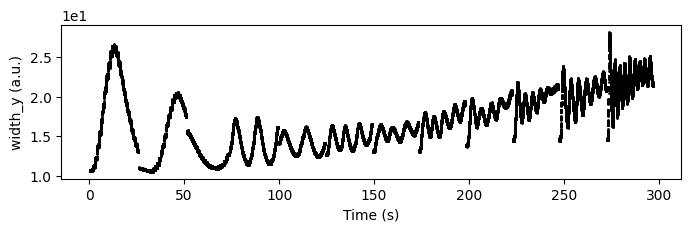

In [30]:
growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 
               'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
D1_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', head_tail=(100,300), interval=200, 
            filename = True, printing=printing_plot)

#### 2.1.6 Upload parameter file to DataFed

In [ ]:
from datafed.CommandLib import API
df_api = API()

name = 'test6_gaussian_fit_parameters_all-04232023.h5'
path = 'D:/datasets/RHEED_data/'+name

dc_resp = df_api.dataCreate(name, parent_id='c/393370045')
rec_id = dc_resp[0].data[0].id
put_resp = df_api.dataPut(rec_id, path, wait=True)
put_resp

(task {
   id: "task/459164235"
   type: TT_DATA_PUT
   status: TS_SUCCEEDED
   client: "u/yig319"
   step: 3
   steps: 4
   msg: "Finished"
   ct: 1682955534
   ut: 1682955698
   source: "5c48764e-bc4f-11ed-98a1-cf2723108f0c/D/datasets/RHEED_data/test6_gaussian_fit_parameters_all-04232023.h5"
   dest: "d/459164229"
 },
 'TaskDataReply')

### 2.2 Sample treated_81nm

#### 2.2.1 Loading the Dataset

In [31]:
path = 'D:/datasets/RHEED_data/STO_STO_test7_06292022-standard.h5'
D2_spot = RHEED_spot_Dataset(path, sample_name='treated_81nm')
D2_spot.data_info

Growth: background_with_heater, Size of data: f(2651, 300, 600)
Growth: background_without_heater, Size of data: f(2652, 300, 600)
Growth: growth_1, Size of data: f(8603, 300, 600)
Growth: growth_10, Size of data: f(9439, 300, 600)
Growth: growth_11, Size of data: f(12155, 300, 600)
Growth: growth_12, Size of data: f(10736, 300, 600)
Growth: growth_2, Size of data: f(10612, 300, 600)
Growth: growth_3, Size of data: f(11648, 300, 600)
Growth: growth_4, Size of data: f(12152, 300, 600)
Growth: growth_5, Size of data: f(12317, 300, 600)
Growth: growth_6, Size of data: f(12453, 300, 600)
Growth: growth_7, Size of data: f(9482, 300, 600)
Growth: growth_8, Size of data: f(9490, 300, 600)
Growth: growth_9, Size of data: f(9704, 300, 600)


#### 2.2.2 Locate the diffraction spots

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_growth_2_10.png
Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_growth_2_10.svg


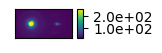

In [32]:
D2_spot.viz_RHEED_spot(growth='growth_2', index=10, filename=True, printing=printing_image)

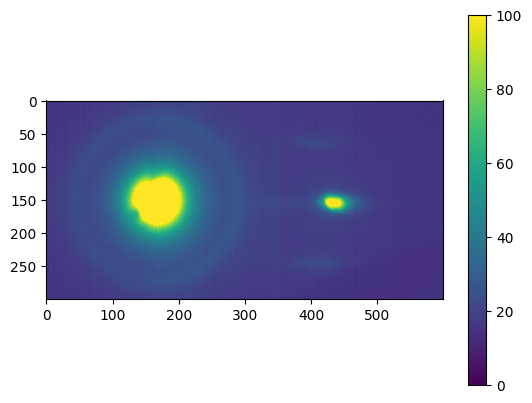

In [33]:
plt.imshow(D2_spot.growth_dataset('growth_2', index=0))
plt.colorbar()
plt.clim(0, 100)

#### 2.2.3 Visualize an example

img_sum:65540.00, img_max:26.00, img_mean:19.86
img_rec_sum:65251.70, img_rec_max:21.53, img_rec_mean:19.77
height:21.53, x:14.19, y:51.74, width_x:27.23, width_y_max:127.01
a: raw_image b: reconstructed_image c: difference


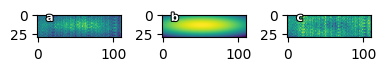

a: original, b: reconstructed image, c: difference
img_sum:62861.00, img_max:26.00, img_mean:19.05
img_rec_sum:62570.65, img_rec_max:20.62, img_rec_mean:18.96
height:20.62, x:13.23, y:45.64, width_x:29.37, width_y_max:122.00
a: raw_image b: reconstructed_image c: difference


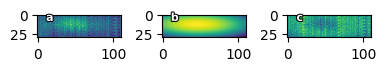

a: original, b: reconstructed image, c: difference
img_sum:52423.00, img_max:94.00, img_mean:59.57
img_rec_sum:51037.70, img_rec_max:89.54, img_rec_mean:58.00
height:89.60, x:11.21, y:19.78, width_x:9.67, width_y_max:17.10
a: raw_image b: reconstructed_image c: difference


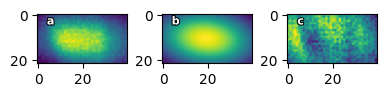

a: original, b: reconstructed image, c: difference
img_sum:38092.00, img_max:63.00, img_mean:43.29
img_rec_sum:37432.69, img_rec_max:58.39, img_rec_mean:42.54
height:58.39, x:11.58, y:22.47, width_x:10.38, width_y_max:23.31
a: raw_image b: reconstructed_image c: difference


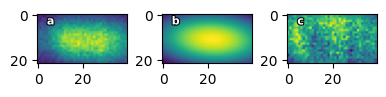

a: original, b: reconstructed image, c: difference
img_sum:87305.00, img_max:27.00, img_mean:19.84
img_rec_sum:87167.35, img_rec_max:21.47, img_rec_mean:19.81
height:21.47, x:24.11, y:49.98, width_x:39.04, width_y_max:130.77
a: raw_image b: reconstructed_image c: difference


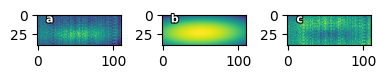

a: original, b: reconstructed image, c: difference
img_sum:88520.00, img_max:28.00, img_mean:20.12
img_rec_sum:88317.24, img_rec_max:22.32, img_rec_mean:20.07
height:22.32, x:23.81, y:49.66, width_x:33.31, width_y_max:115.16
a: raw_image b: reconstructed_image c: difference


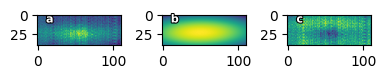

a: original, b: reconstructed image, c: difference


In [34]:
crop_dict = {'spot_1': [50, 80, 340, 450], 'spot_2': [143, 165, 415, 455], 'spot_3': [220, 260, 340, 450]}
fit_function = Gaussian().recreate_gaussian
processor = RHEED_image_processer(D2_spot, crop_dict, fit_function)
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_1', frame=1000)
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_1', frame=1000)

img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_2', frame=1000)
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_2', frame=1000)

img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_3', frame=1000)
img, img_rec, parameters = processor.visualize(growth='growth_12', spot='spot_3', frame=1000)

#### 2.2.4 Generate the metrics of spot

In [ ]:
parameters_file_path =  'D:/datasets/RHEED_data/test7_gaussian_fit_parameters_all-04232023.h5'
growth_list = ['background_with_heater', 'background_without_heater', 'growth_1', 'growth_2', 'growth_3', 'growth_4', 
             'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']

if __name__ == '__main__':
    processor.write_h5_file(parameters_file_path, growth_list, replace=False)

c:\Users\yig319\Anaconda3\envs\m3\lib\site-packages\scipy\optimize\_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


#### 2.2.5 Exam the dataset

In [35]:
path = 'D:/datasets/RHEED_data/test7_gaussian_fit_parameters_all-04232023.h5'
D2_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='treated_81nm')
D2_para.data_info

Growth: background_with_heater:
--spot: spot_1:
----height:, Size of data: (2651,)
----height:, Size of data: (2651,)
----img_max:, Size of data: (2651,)
----img_max:, Size of data: (2651,)
----img_mean:, Size of data: (2651,)
----img_mean:, Size of data: (2651,)
----img_rec_max:, Size of data: (2651,)
----img_rec_max:, Size of data: (2651,)
----img_rec_mean:, Size of data: (2651,)
----img_rec_mean:, Size of data: (2651,)
----img_rec_sum:, Size of data: (2651,)
----img_rec_sum:, Size of data: (2651,)
----img_sum:, Size of data: (2651,)
----img_sum:, Size of data: (2651,)
----raw_image:, Size of data: (2651, 30, 110)
----raw_image:, Size of data: (2651, 30, 110)
----reconstructed_image:, Size of data: (2651, 30, 110)
----reconstructed_image:, Size of data: (2651, 30, 110)
----width_x:, Size of data: (2651,)
----width_x:, Size of data: (2651,)
----width_y:, Size of data: (2651,)
----width_y:, Size of data: (2651,)
----x:, Size of data: (2651,)
----x:, Size of data: (2651,)
----y:, Size o

img_sum:35031.00, img_max:58.00, img_mean:39.81
img_rec_sum:34451.97, img_rec_max:52.63, img_rec_mean:39.15
height:52.64, x:11.50, y:22.16, width_x:11.22, width_y_max:22.80
a: raw_image b: reconstructed_image c: difference
Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_growth_2_spot_2_10000_img,img_rec,differerce.png
Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_growth_2_spot_2_10000_img,img_rec,differerce.svg


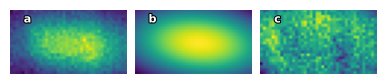

In [36]:
D2_para.viz_RHEED_parameter(growth='growth_2', spot='spot_2', index=10000, 
                            filename=True, printing=printing_image)

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_img_sum.png


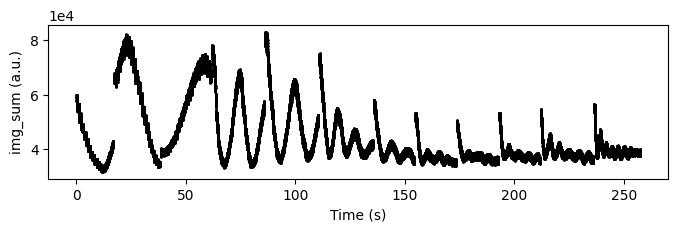

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_img_max.png


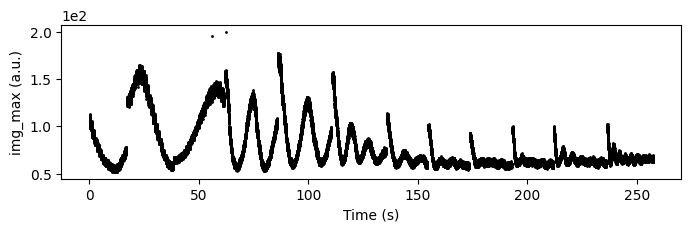

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_img_mean.png


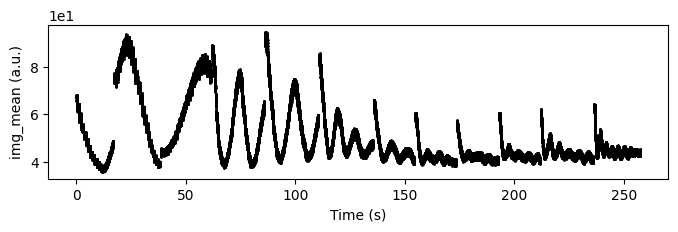

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_img_rec_sum.png


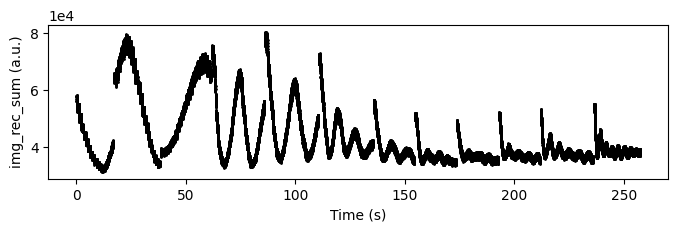

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_img_rec_max.png


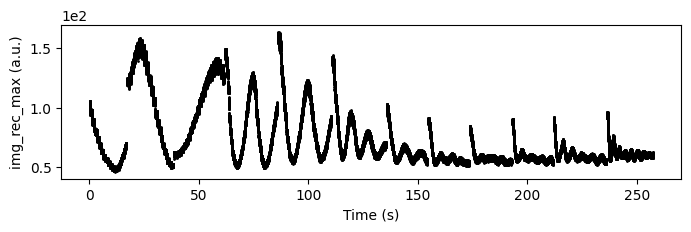

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_img_rec_mean.png


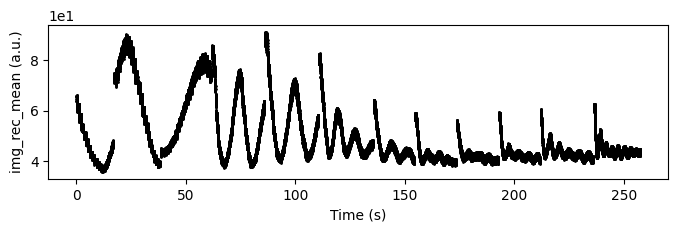

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_height.png


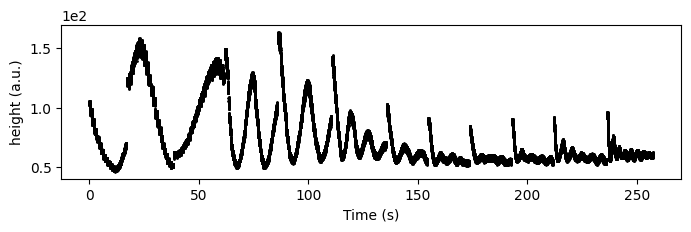

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_x.png


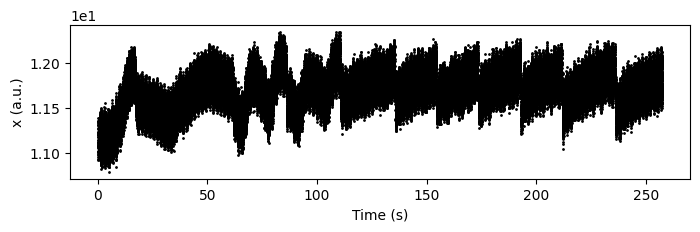

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_y.png


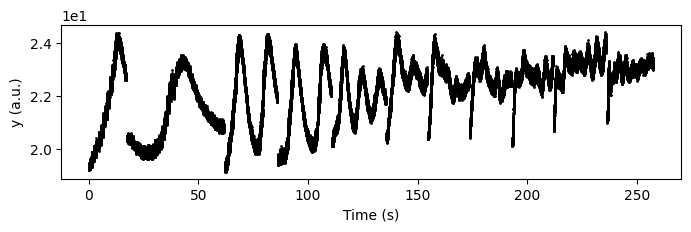

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_width_x.png


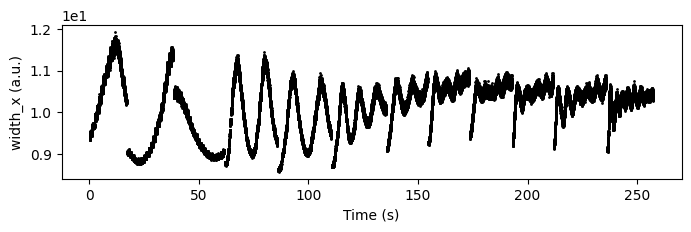

Figures/1.Fit_RHEED_spot/RHEED_treated_81nm_spot_2_width_y.png


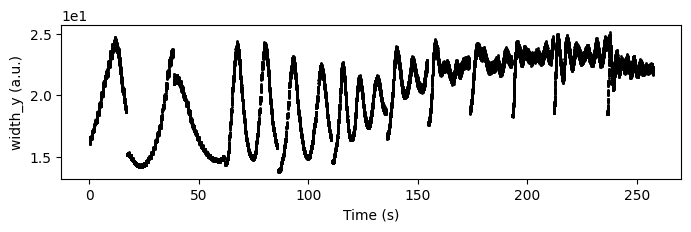

In [37]:
growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
D2_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', filename=True, printing=printing_plot)

#### 2.2.6 Upload parameter file to DataFed

In [ ]:
from datafed.CommandLib import API
df_api = API()

name = 'test7_gaussian_fit_parameters_all-04232023.h5'
path = 'D:/datasets/RHEED_data/'+name

dc_resp = df_api.dataCreate(name, parent_id='c/393370045')
rec_id = dc_resp[0].data[0].id
put_resp = df_api.dataPut(rec_id, path, wait=True)
put_resp

(task {
   id: "task/458939352"
   type: TT_DATA_PUT
   status: TS_SUCCEEDED
   client: "u/yig319"
   step: 3
   steps: 4
   msg: "Finished"
   ct: 1682699341
   ut: 1682699555
   source: "5c48764e-bc4f-11ed-98a1-cf2723108f0c/D/datasets/RHEED_data/test7_gaussian_fit_parameters_all-04232023.h5"
   dest: "d/458939346"
 },
 'TaskDataReply')

### 2.3 Sample untreated_162nm

#### 2.3.1 Loading the Dataset

In [38]:
path = 'D:/datasets/RHEED_data/STO_STO_test9_07142022-standard.h5'
D3_spot = RHEED_spot_Dataset(path, sample_name='untreated_162nm')
D3_spot.data_info

Growth: background_with_heater, Size of data: f(2023, 300, 300)
Growth: background_without_heater, Size of data: f(3060, 300, 300)
Growth: growth_1, Size of data: f(13510, 300, 300)
Growth: growth_10, Size of data: f(12488, 300, 300)
Growth: growth_11, Size of data: f(12221, 300, 300)
Growth: growth_12, Size of data: f(12526, 300, 300)
Growth: growth_13, Size of data: f(12318, 300, 300)
Growth: growth_14, Size of data: f(12206, 300, 300)
Growth: growth_15, Size of data: f(12269, 300, 300)
Growth: growth_16, Size of data: f(12133, 300, 300)
Growth: growth_17, Size of data: f(12085, 300, 300)
Growth: growth_18, Size of data: f(12113, 300, 300)
Growth: growth_2, Size of data: f(9321, 300, 300)
Growth: growth_3, Size of data: f(12008, 300, 300)
Growth: growth_4, Size of data: f(13125, 300, 300)
Growth: growth_5, Size of data: f(12982, 300, 300)
Growth: growth_6, Size of data: f(12776, 300, 300)
Growth: growth_7, Size of data: f(12670, 300, 300)
Growth: growth_8, Size of data: f(12441, 300,

#### 2.3.2 Locate the diffraction spots

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_growth_2_0.png
Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_growth_2_0.svg


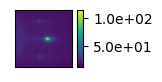

In [39]:
D3_spot.viz_RHEED_spot(growth='growth_2', index=0, filename=True, printing=printing_image)

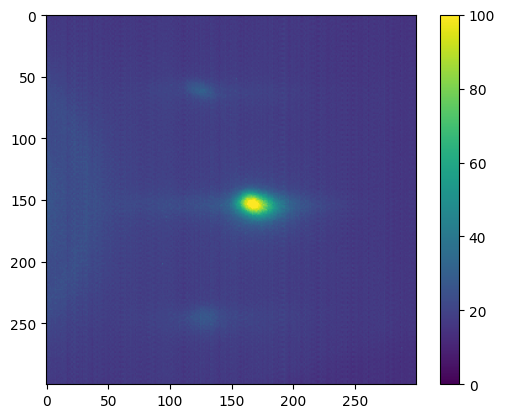

In [40]:
plt.imshow(D3_spot.growth_dataset('growth_2', index=0))
plt.colorbar()
plt.clim(0, 100)

#### 2.3.3 Visualize an example

img_sum:23046.00, img_max:33.00, img_mean:20.95
img_rec_sum:22881.26, img_rec_max:24.39, img_rec_mean:20.80
height:24.39, x:12.31, y:26.93, width_x:16.87, width_y_max:36.30
a: raw_image b: reconstructed_image c: difference


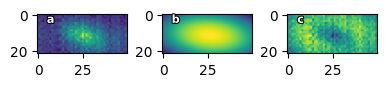

a: original, b: reconstructed image, c: difference
img_sum:22782.00, img_max:30.00, img_mean:20.71
img_rec_sum:22540.11, img_rec_max:23.95, img_rec_mean:20.49
height:23.95, x:10.74, y:23.69, width_x:15.40, width_y_max:40.17
a: raw_image b: reconstructed_image c: difference


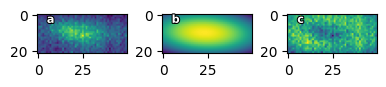

a: original, b: reconstructed image, c: difference
img_sum:58629.00, img_max:172.00, img_mean:77.14
img_rec_sum:56051.32, img_rec_max:152.96, img_rec_mean:73.75
height:153.25, x:11.26, y:18.91, width_x:7.66, width_y_max:11.11
a: raw_image b: reconstructed_image c: difference


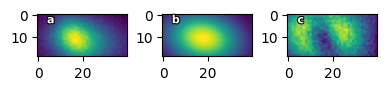

a: original, b: reconstructed image, c: difference
img_sum:35114.00, img_max:92.00, img_mean:46.20
img_rec_sum:33973.47, img_rec_max:75.65, img_rec_mean:44.70
height:75.75, x:10.23, y:20.99, width_x:7.94, width_y_max:14.74
a: raw_image b: reconstructed_image c: difference


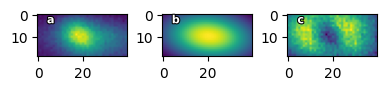

a: original, b: reconstructed image, c: difference
img_sum:56802.00, img_max:29.00, img_mean:19.86
img_rec_sum:56669.50, img_rec_max:21.97, img_rec_mean:19.81
height:21.97, x:26.85, y:31.92, width_x:40.82, width_y_max:61.30
a: raw_image b: reconstructed_image c: difference


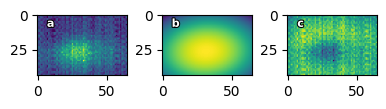

a: original, b: reconstructed image, c: difference
img_sum:57391.00, img_max:32.00, img_mean:20.07
img_rec_sum:57205.76, img_rec_max:23.31, img_rec_mean:20.00
height:23.31, x:26.83, y:34.85, width_x:31.40, width_y_max:54.38
a: raw_image b: reconstructed_image c: difference


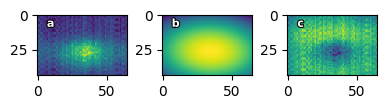

a: original, b: reconstructed image, c: difference


In [41]:
crop_dict = {'spot_1': [50, 72, 100, 150], 'spot_2': [143, 162, 150, 190], 'spot_3': [218, 262, 100, 165]}
fit_function = Gaussian().recreate_gaussian
processor = RHEED_image_processer(D3_spot, crop_dict, fit_function)
img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_1', frame=1000)
img, img_rec, parameters = processor.visualize(growth='growth_18', spot='spot_1', frame=1000)

img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_2', frame=1000)
img, img_rec, parameters = processor.visualize(growth='growth_18', spot='spot_2', frame=1000)

img, img_rec, parameters = processor.visualize(growth='growth_1', spot='spot_3', frame=1000)
img, img_rec, parameters = processor.visualize(growth='growth_18', spot='spot_3', frame=1000)

#### 2.3.4 Generate the metrics of spot

In [ ]:
parameters_file_path =  'D:/datasets/RHEED_data/test9_gaussian_fit_parameters_all-04232023.h5'
growth_list = ['background_with_heater', 'background_without_heater', 'growth_1', 'growth_2', 'growth_3', 'growth_4', 
               'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12' , 
               'growth_13', 'growth_14', 'growth_15', 'growth_16', 'growth_17', 'growth_18']

if __name__ == '__main__':
    processor.write_h5_file(parameters_file_path, growth_list, replace=False)

#### 2.3.5 Exam the dataset

In [42]:
path = 'D:/datasets/RHEED_data/test9_gaussian_fit_parameters_all-04232023.h5'
D3_para = RHEED_parameter_dataset(path, camera_freq=500, sample_name='untreated_162nm')
D3_para.data_info

Growth: background_with_heater:
--spot: spot_1:
----height:, Size of data: (2023,)
----height:, Size of data: (2023,)
----img_max:, Size of data: (2023,)
----img_max:, Size of data: (2023,)
----img_mean:, Size of data: (2023,)
----img_mean:, Size of data: (2023,)
----img_rec_max:, Size of data: (2023,)
----img_rec_max:, Size of data: (2023,)
----img_rec_mean:, Size of data: (2023,)
----img_rec_mean:, Size of data: (2023,)
----img_rec_sum:, Size of data: (2023,)
----img_rec_sum:, Size of data: (2023,)
----img_sum:, Size of data: (2023,)
----img_sum:, Size of data: (2023,)
----raw_image:, Size of data: (2023, 22, 50)
----raw_image:, Size of data: (2023, 22, 50)
----reconstructed_image:, Size of data: (2023, 22, 50)
----reconstructed_image:, Size of data: (2023, 22, 50)
----width_x:, Size of data: (2023,)
----width_x:, Size of data: (2023,)
----width_y:, Size of data: (2023,)
----width_y:, Size of data: (2023,)
----x:, Size of data: (2023,)
----x:, Size of data: (2023,)
----y:, Size of da

img_sum:45893.00, img_max:114.00, img_mean:60.39
img_rec_sum:44505.52, img_rec_max:101.14, img_rec_mean:58.56
height:101.29, x:10.95, y:19.21, width_x:8.27, width_y_max:13.94
a: raw_image b: reconstructed_image c: difference
Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_growth_2_spot_2_100_img,img_rec,differerce.png
Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_growth_2_spot_2_100_img,img_rec,differerce.svg


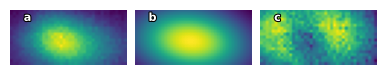

In [43]:
D3_para.viz_RHEED_parameter(growth='growth_2', spot='spot_2', index=100, filename=True, printing=printing_image)

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_img_sum.png


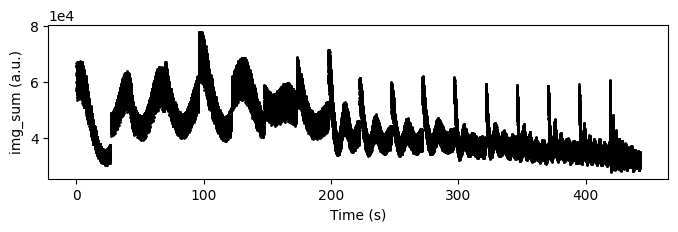

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_img_max.png


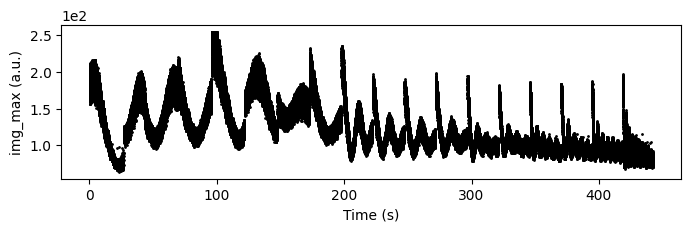

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_img_mean.png


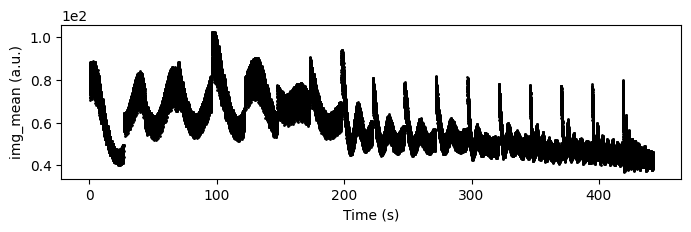

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_img_rec_sum.png


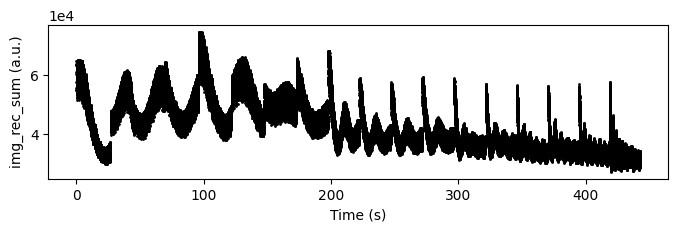

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_img_rec_max.png


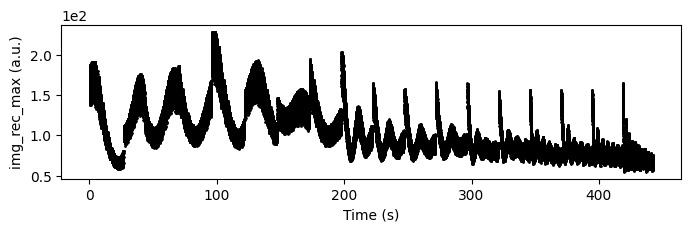

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_img_rec_mean.png


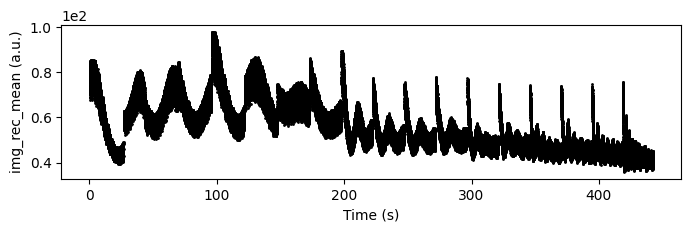

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_height.png


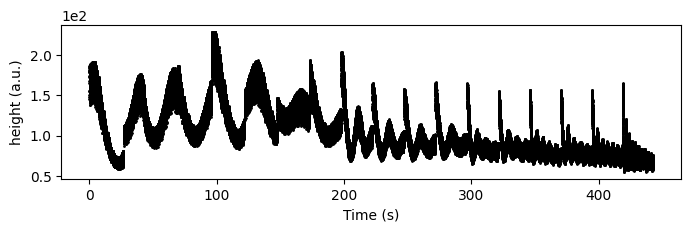

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_x.png


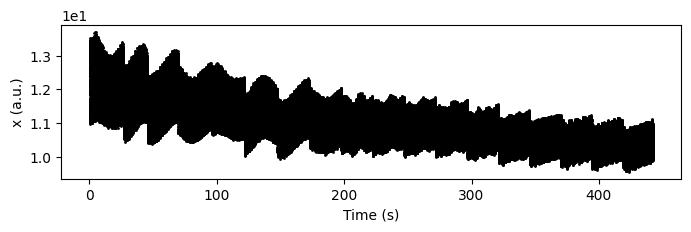

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_y.png


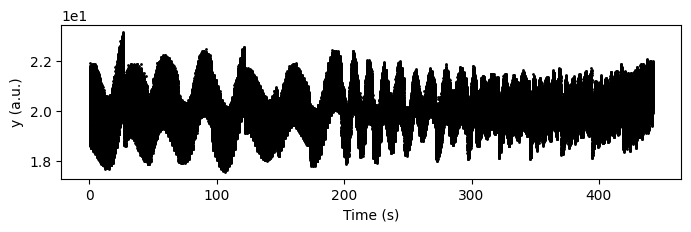

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_width_x.png


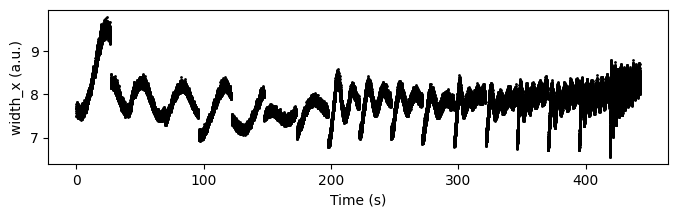

Figures/1.Fit_RHEED_spot/RHEED_untreated_162nm_spot_2_width_y.png


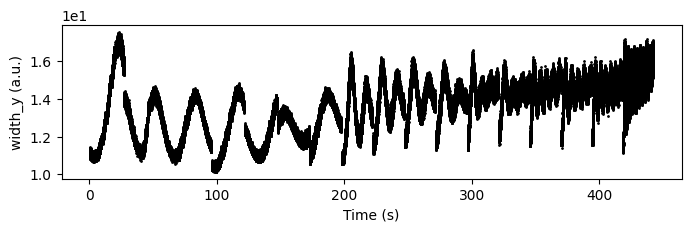

In [44]:
growth_list = ['growth_1', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 
               'growth_10', 'growth_11', 'growth_12' , 'growth_13', 'growth_14', 'growth_15', 'growth_16', 'growth_17', 'growth_18']
D3_para.viz_RHEED_parameter_trend(growth_list, spot='spot_2', filename = True, printing=printing_plot)

#### 2.3.6 Upload parameter file to DataFed

In [ ]:
from datafed.CommandLib import API
df_api = API()

name = 'test9_gaussian_fit_parameters_all-04232023.h5'
path = 'D:/datasets/RHEED_data/'+name

dc_resp = df_api.dataCreate(name, parent_id='c/393370045')
rec_id = dc_resp[0].data[0].id
put_resp = df_api.dataPut(rec_id, path, wait=True)
put_resp

(task {
   id: "task/458938778"
   type: TT_DATA_PUT
   status: TS_SUCCEEDED
   client: "u/yig319"
   step: 3
   steps: 4
   msg: "Finished"
   ct: 1682699151
   ut: 1682699339
   source: "5c48764e-bc4f-11ed-98a1-cf2723108f0c/D/datasets/RHEED_data/test9_gaussian_fit_parameters_all-04232023.h5"
   dest: "d/458938772"
 },
 'TaskDataReply')